In [1]:
from quantum_dataset import QM7, QM7b, QM9, Champs, SuperSet
from quantum_learning import Learn, Selector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss

RDKit WARNING: [18:04:00] Enabling RDKit 2019.09.3 jupyter extensions


<class 'quantum_dataset.QM7'> dataset created...
epoch: 0 of 2, train loss: 860680.6273003472, val loss: 335588.13814871653
epoch: 1 of 2, train loss: 167839.79682074653, val loss: 158503.96557617188
test loss: 82153.22605298914


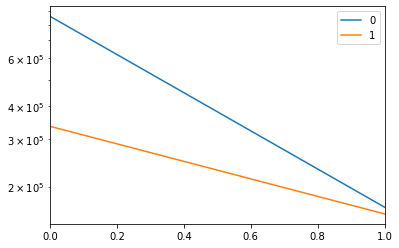

learning time: 0:00:07.723927


In [2]:
# load a model and train it some more and save it
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss, 
      batch_size=32, epochs=2, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=True, load_model=False)

<class 'quantum_dataset.QM7b'> dataset created...
epoch: 0 of 2, train loss: 869108.1805507597, val loss: 249749.40414131636
epoch: 1 of 2, train loss: 109541.16541134323, val loss: 106561.67860723175
test loss: 52758.97605298913


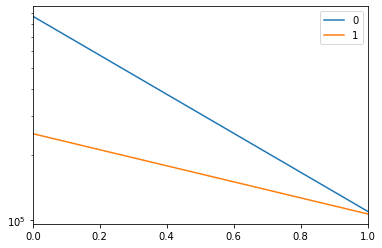

learning time: 0:00:07.327735


In [3]:
# QM7b vs QM7
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 'H': 4096, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, 
      Optimizer=Adam, Criterion=MSELoss, batch_size=32, epochs=2, 
      opt_params=opt_params, model_params=model_params, ds_params=ds_params, 
      crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+14, 'H': 2048, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb','A','B','C','alpha','homo','lumo',
                          'gap','r2','zpve','U0','U','H','G','Cv'], 
             'target': 'mu',
             'dim': 29*29,
             'use_pickle': True}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=32, epochs=2, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
# train a model and save it
opt_params = {'lr': 0.001}
model_params = {'D_in': 198, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': [],
             'use_h5': False,  
             'infer': False}
crit_params = {'reduction': 'sum'}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=2048, epochs=2, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
# load the model and perform inference on a test set and save the results
model_params = {'D_in': 166, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 'use_h5': True, 'infer': True}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, batch_size=2048, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20200603_1206.pth', adapt=False)